<a href="https://colab.research.google.com/github/Rmkh77/weather-prediction/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # used for mathametical calculations
import pandas as pd # used to read data set
import matplotlib.pyplot as plt # used in plotting graphs
import seaborn as sns #used to draw heat map

In [ ]:
temp=pd.read_csv("/content/drive/MyDrive/project_hbic/temp/seattle-weather.csv")

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
temp.drop(columns=['date'],inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<function matplotlib.pyplot.show(close=None, block=None)>

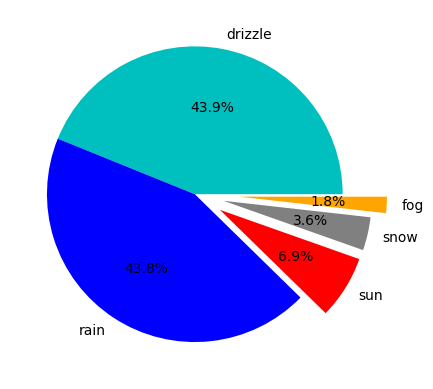

In [ ]:
names=temp['weather'].unique()
value=temp['weather'].value_counts()
cols = ['c','b','r','grey', 'orange']
plt.pie(value,labels=names,colors=cols,explode =(0,0,0.2,0.2,0.3),autopct ='%1.1f%%')
plt.show

In [ ]:
temp['weather'].replace({"drizzle":1,"fog":2,'snow':3,'sun':4,'rain':5},inplace=True)

In [ ]:
target=temp['weather']
temp.drop(columns=['weather'],inplace=True)

boxplot for :precipitation


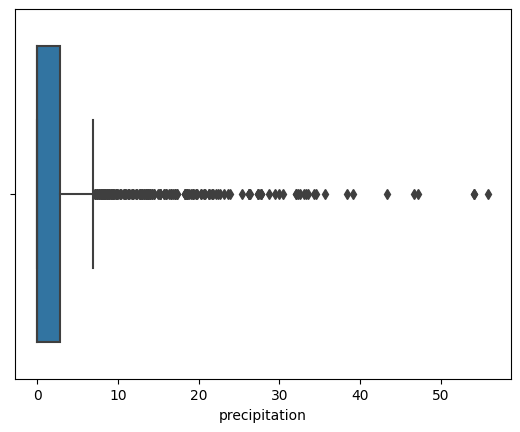

boxplot for :temp_max


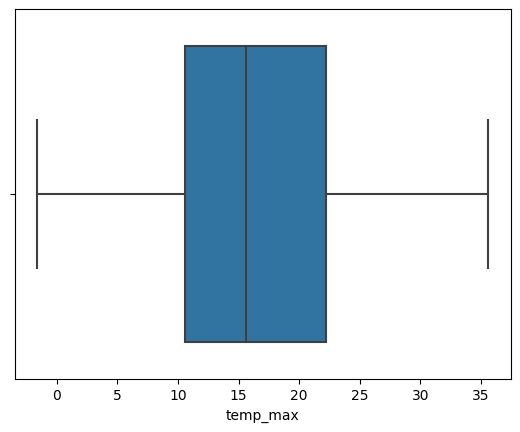

boxplot for :temp_min


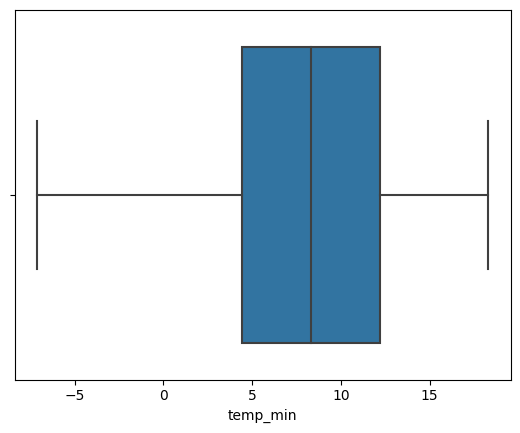

boxplot for :wind


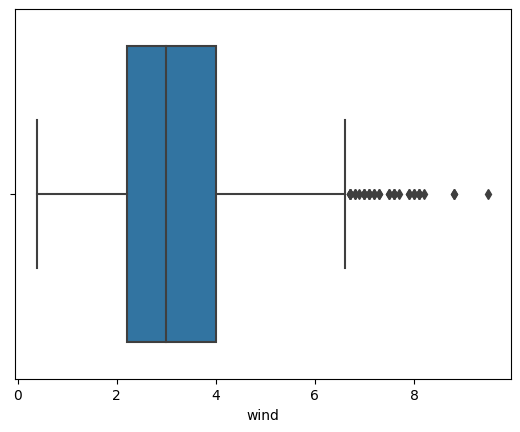

In [ ]:
# plotting box plots for numerical columns to know about outliers
for i in temp:
  sns.boxplot(x=temp[i])
  print("boxplot for :"+i)
  plt.show()

In [ ]:
# importing necessary modules
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# importing metics module for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp, target, train_size=0.7, random_state=100)
# splitting data set into 4 which are test data set
# train data set
#test target column
# train target column

In [ ]:
# defining a method in which fitting and predicting is done
data=[]
def modeling(model, alg_name, params={}):
    model.fit(X_train, y_train) # fitting model
    y_pred = model.predict(X_test) # predicting model
    data.append(y_pred)
    print_scores(alg_name, y_test, y_pred) # calling printing() to print performance
    return model

In [ ]:
# evaluation measures
def print_scores(alg, y_true, y_pred):
  print(alg)
  alg_names.append(alg)
  acc_score = accuracy_score(y_true, y_pred)
  alg_values.append(acc_score)
  print("accuracy: ",acc_score)
  # pre_score = precision_score(y_true, y_pred)
  # print("precision: ",pre_score)
  # rec_score = recall_score(y_true, y_pred)
  # print("recall: ",rec_score)
  # f_score = f1_score(y_true, y_pred, average='weighted')
  # print("f1_score: ",f_score)

In [ ]:
alg_names=[]
alg_values=[]

In [ ]:
# decision tree classification
dt_model = modeling(DecisionTreeClassifier(), "Decision Tree Classification")
dt_model

Decision Tree Classification
accuracy:  0.7630979498861048


DecisionTreeClassifier()

In [ ]:
#Random Forest Classifier
dt_model = modeling(RandomForestClassifier(), "Random Forest Classifier")
dt_model

Random Forest Classifier
accuracy:  0.8519362186788155


RandomForestClassifier()

In [ ]:
# navie bayes classification
nb_model = modeling(GaussianNB(), "Naive Bayes Classification")
nb_model

Naive Bayes Classification
accuracy:  0.8678815489749431


GaussianNB()

In [ ]:
# Gradient Boosting Classifier
nb_model = modeling(GradientBoostingClassifier(), "Gradient Boosting Classifier")
nb_model

Gradient Boosting Classifier
accuracy:  0.8542141230068337


GradientBoostingClassifier()

In [ ]:
nb_model = modeling(KNeighborsClassifier(), "K Neighbors Classifier")
nb_model
# KNN algorithm

K Neighbors Classifier
accuracy:  0.7630979498861048


KNeighborsClassifier()

In [ ]:
nb_model = modeling(MLPClassifier(), "MLP Classifierr")
nb_model
# neural network

MLP Classifierr
accuracy:  0.8701594533029613


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
from sklearn.linear_model import LogisticRegression
lb=modeling(LogisticRegression(),'logisticregressiion')
lb

logisticregressiion
accuracy:  0.8678815489749431


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
alg_names

['Decision Tree Classification',
 'Random Forest Classifier',
 'Naive Bayes Classification',
 'Gradient Boosting Classifier',
 'K Neighbors Classifier',
 'MLP Classifierr',
 'logisticregressiion']

In [ ]:
alg_values

[0.7630979498861048,
 0.8519362186788155,
 0.8678815489749431,
 0.8542141230068337,
 0.7630979498861048,
 0.8701594533029613,
 0.8678815489749431]

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Decision Tree Classification'),
  Text(1, 0, 'Random Forest Classifier'),
  Text(2, 0, 'Naive Bayes Classification'),
  Text(3, 0, 'Gradient Boosting Classifier'),
  Text(4, 0, 'K Neighbors Classifier'),
  Text(5, 0, 'MLP Classifierr'),
  Text(6, 0, 'logisticregressiion')])

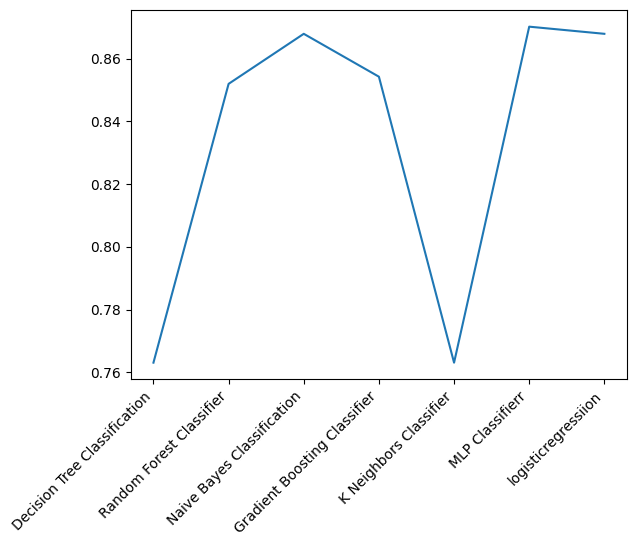

In [ ]:
plt.plot(alg_names,alg_values)
plt.xticks(rotation=45,ha='right')
# plotting line graph to show all accuracies of algorithms that have been used